# Repeated measures

> Explanation of how to use dabest for repeated measures analysis.

- order: 2

DABEST version 2023.02.14 expands the repertoire of plots for experiments with repeated-measures designs. DABEST now allows the visualization of paired experiments with one control and multiple test 
groups, as well as repeated measurements of the same group. This is an improved version of paired data plotting in previous versions, which only supported computations involving one test group and one control group.

The repeated-measures function supports the calculation of effect sizes for
paired data, either based on sequential comparisons (group i vs group i + 1) 
or baseline comparisons (control vs group i). To use these features, 
you can simply declare the argument ``paired = "sequential"`` or ``paired = "baseline"`` 
correspondingly while running ``dabest.load()``. As in the previous version, you must also pass a column in the dataset that indicates the identity of each observation, using the 
``id_col`` keyword. 

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #8a6d3b;; background-color: #fcf8e3; border-color: #faebcc;">
 **(Please note that** ``paired = True`` **and** ``paired = False`` **are no longer valid since v2023.02.14)**
</div>



## Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2024.03.29


In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # to suppress warnings related to points not being able to be plotted due to dot size

## Creating a demo dataset

In [ ]:
from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed so the results are reproducible.
Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                   'Control 2' : c2,     'Test 2' : t2,
                   'Control 3' : c3,     'Test 3' : t3,
                   'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                   'Gender'    : gender, 'ID'  : id_col
                  })

In [ ]:
two_groups_paired_sequential = dabest.load(df, idx=("Control 1", "Test 1"),
                                               paired="sequential", id_col="ID")

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


In [ ]:
two_groups_paired_sequential

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:57 2024.

Paired effect size(s) for the sequential design of repeated-measures experiment 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
two_groups_paired_baseline = dabest.load(df, idx=("Control 1", "Test 1"),
                                  paired="baseline", id_col="ID")

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


In [ ]:
two_groups_paired_baseline

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:57 2024.

Paired effect size(s) for repeated measures against baseline 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

When dealing with only 2 paired data groups, assigning either ``baseline`` or ``sequential`` to the ``paired`` parameter will yield the same numerical results

In [ ]:
two_groups_paired_sequential.mean_diff

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:58 2024.

The paired mean difference for the sequential design of repeated-measures experiment 
between Control 1 and Test 1 is 0.48 [95%CI 0.237, 0.73].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [ ]:
two_groups_paired_baseline.mean_diff

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:40:58 2024.

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 1 is 0.48 [95%CI 0.237, 0.73].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

For paired data, we use
[slopegraphs](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=0003nk>)
(another innovation from Edward Tufte) to connect paired observations.
Both Gardner-Altman and Cumming plots support this.


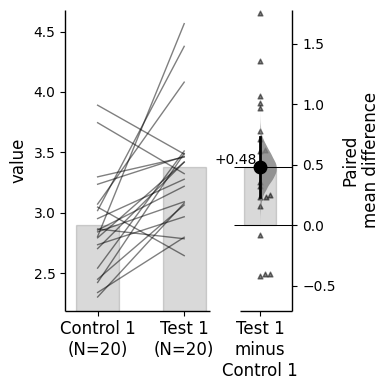

In [ ]:
two_groups_paired_sequential.mean_diff.plot();

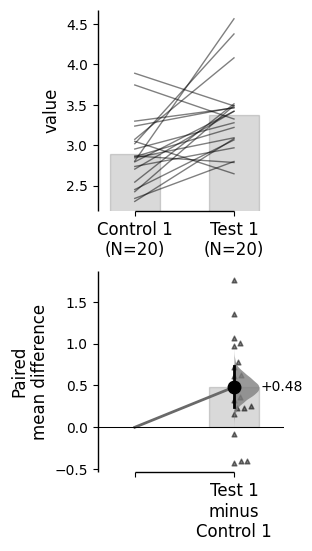

In [ ]:
two_groups_paired_sequential.mean_diff.plot(float_contrast=False);

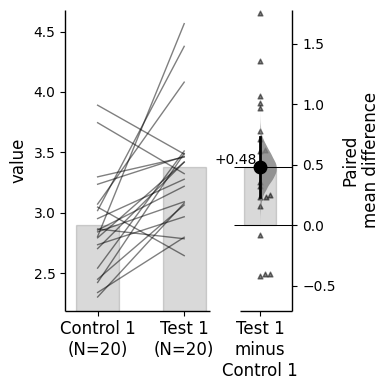

In [ ]:
two_groups_paired_baseline.mean_diff.plot();

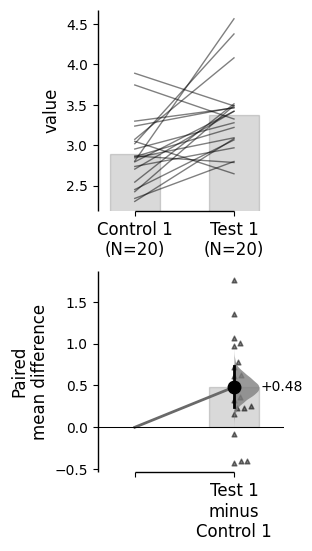

In [ ]:
two_groups_paired_baseline.mean_diff.plot(float_contrast=False);

When creating repeated-measures plots with multiple test groups, declaring ``paired`` as ``sequential`` or ``baseline`` will generate different results.

In [ ]:
sequential_repeated_measures = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3"),
                                               paired="sequential", id_col="ID")

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


In [ ]:
sequential_repeated_measures.mean_diff

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:41:00 2024.

The paired mean difference for the sequential design of repeated-measures experiment 
between Control 1 and Test 1 is 0.48 [95%CI 0.237, 0.73].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

The paired mean difference for the sequential design of repeated-measures experiment 
between Test 1 and Test 2 is -1.02 [95%CI -1.36, -0.716].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The paired mean difference for the sequential design of repeated-measures experiment 
between Test 2 and Test 3 is 0.716 [95%CI 0.14, 1.22].
The p-value of the two-sided permutation t-test is 0.022, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assumin

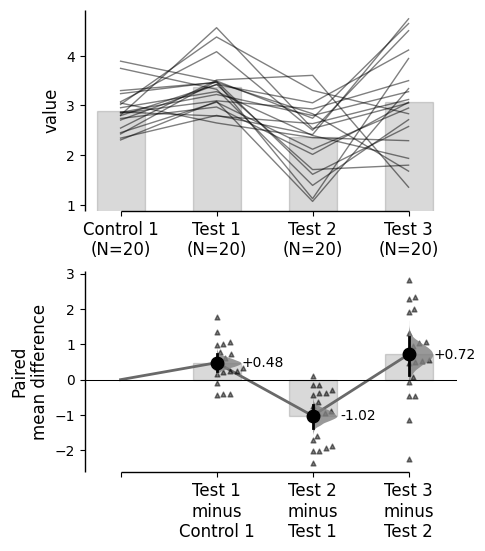

In [ ]:
sequential_repeated_measures.mean_diff.plot();

In [ ]:
baseline_repeated_measures = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3"),
                                               paired="baseline", id_col="ID")

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:115: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([t for t in idx]).tolist()


In [ ]:
baseline_repeated_measures.mean_diff

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Dec  4 11:41:01 2024.

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 1 is 0.48 [95%CI 0.237, 0.73].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 2 is -0.542 [95%CI -0.975, -0.198].
The p-value of the two-sided permutation t-test is 0.014, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 3 is 0.174 [95%CI -0.297, 0.706].
The p-value of the two-sided permutation t-test is 0.505, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is 

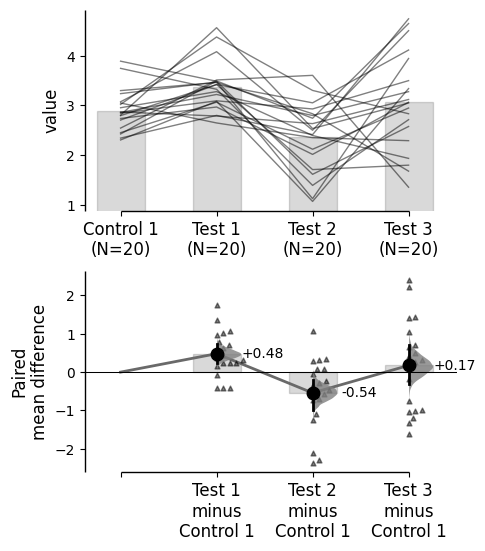

In [ ]:
baseline_repeated_measures.mean_diff.plot();

Similar to unpaired data, DABEST empowers you to perform complex 
visualizations and statistics for paired data.

/Users/jonathananns/GitHub/DABEST-python/dabest/_dabest_object.py:125: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_plot_groups = pd.unique([tt for t in idx for tt in t]).tolist()


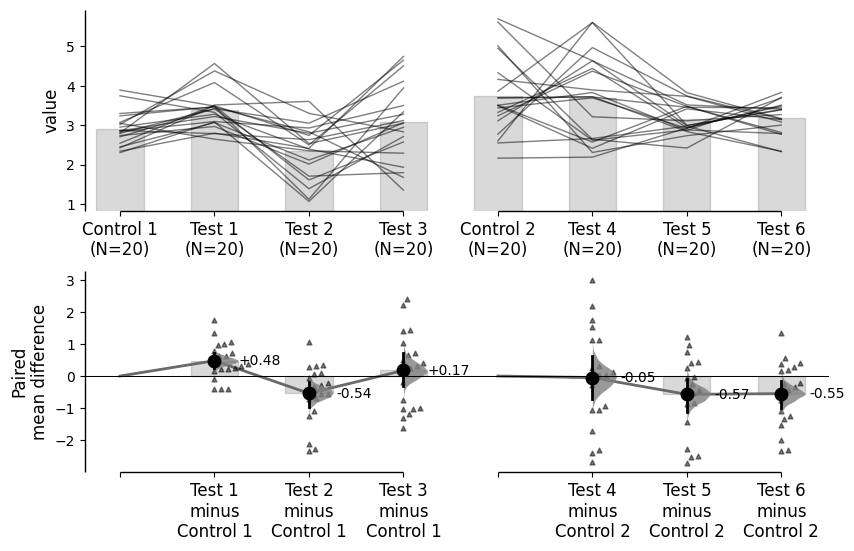

In [ ]:
multi_baseline_repeated_measures = dabest.load(df, idx=(("Control 1", "Test 1", "Test 2", "Test 3"),
                                                      ("Control 2", "Test 4", "Test 5", "Test 6")),
                                               paired="baseline", id_col="ID")
multi_baseline_repeated_measures.mean_diff.plot();